Run and test codes for NenuFAR data

In [306]:
import warnings
warnings.filterwarnings('ignore')

# from nenupy.io import Spectra
from nenupy.io.tf import Spectra, TFTask, TFPipeline
import os
import glob
import numpy as np
# import pandas as pd
# from datetime import datetime
# import sunpy
# from sunpy.map import Map
# from sunpy.coordinates import sun
# from sunpy.coordinates import frames
# from sunpy.sun import constants as const
import matplotlib.pyplot as plt
# import matplotlib.colors as colors
import matplotlib.dates as mdates
import astropy.units as u
from astropy.time import Time
# import astropy.io.fits as fits
# import astropy.constants as astro_const
# from astropy.coordinates import SkyCoord

# set the directory path where the data is importe/stored
data_dir = '/databf/nenufar-tf/LT11'
year     = '2025'
month    = '03'
obs_dir  = '20250325_091200_20250325_145000_SUN_TRACKING'

In [ ]:
...

In [24]:
spectra_file = sorted(glob.glob(f'{data_dir}/{year}/{month}/{obs_dir}/*.spectra'))

print(*spectra_file, sep='\n')

/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra
/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_1.spectra


In [25]:
filename = spectra_file[0]

sp = Spectra(filename)

2025-04-28 15:05:51 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-04-28 15:05:51 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-04-28 15:05:51 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-28 15:07:06 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-04-28 15:07:06 | INFO: Computing time-frequency axes...
2025-04-28 15:07:06 | INFO: Re-organize data into Jones matrices...
2025-04-28 15:07:06 | INFO: 	Convert data to Dask array
2025-04-28 15:07:06 | INFO: Data loaded.


In [26]:
[x for x in dir(sp) if not x.startswith('_')]

['data',
 'df',
 'dt',
 'filename',
 'frequency_max',
 'frequency_min',
 'get',
 'info',
 'n_channels',
 'n_subbands',
 'pipeline',
 'select_raw_data',
 'time_max',
 'time_min']

In [43]:
sp.data

dask.array<reshape, shape=(962388, 6144, 2, 2), dtype=complex64, chunksize=(1260, 6144, 1, 1), chunktype=numpy.ndarray>

In [65]:
sp.info()

filename: /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra
time_min: 2025-03-25T09:13:12.0000103
time_max: 2025-03-25T14:49:34.7391155
dt: 20.97152 ms
frequency_min: 21.6796875 MHz
frequency_max: 59.1796875 MHz
df: 6.103515625 kHz
Available beam indices: ['0']


In [64]:
print(f'Max freq: {sp.frequency_max:.2f}')
print(f'Min freq: {sp.frequency_min:.2f}')
print(f'Freq resolution: {sp.df.to("kHz"):.2f}')
print(f'Num of channels: {sp.n_channels}')
print(f'Num of subbands: {sp.n_subbands}')
print(f'Start time: {sp.time_min.iso}')
print(f'End time: {sp.time_max.iso}')
print(f'Time cadence: {sp.dt.to("ms"):.2f}')

Max freq: 59.18 MHz
Min freq: 21.68 MHz
Freq resolution: 6.10 kHz
Num of channels: 32
Num of subbands: 192
Start time: 2025-03-25 09:13:12.0000103
End time: 2025-03-25 14:49:34.7391155
Time cadence: 20.97 ms


In [66]:
sp.pipeline.info()

Pipeline configuration:
	0 - Correct bandpass
	(1 - Remove subband channels)
	(2 - Rebin in time)
	(3 - Rebin in frequency)
	4 - Compute Stokes parameters


In [67]:
print( sp.pipeline.parameters.info() )

channels: 32
dt: 0.02097152 s
df: 6103.515625 Hz
tmin: 2025-03-25T09:13:12.0000103
tmax: 2025-03-25T14:49:34.7391155
fmin: 21.6796875 MHz
fmax: 59.1796875 MHz
beam: 0
dispersion_measure: None
rotation_measure: None
rebin_dt: None
rebin_df: None
remove_channels: None
skycoord: None
calib_dt: None
dreambeam_parallactic: True
stokes: I
overwrite: False
smooth_frequency_profile: False



In [79]:
# sp.pipeline.parameters['tmin'] = '2025-03-25T12:17:00'
# sp.pipeline.parameters['tmax'] = '2025-03-25T13:27:00'

In [102]:
phenomenon      = 'typeII'
output_filename = f"{sp.pipeline.parameters['tmin'].value.split('T')[0]}_{phenomenon}"

data = sp.get(file_name=f'./{output_filename}.hdf5',
              stokes='I',
              tmin=Time('2025-03-25T12:17:00', format='isot'),
              tmax=Time('2025-03-25T13:27:00', format='isot'),
              ignore_volume_warning=True
            )

2025-04-28 17:38:49 | INFO: Selecting times (between 2025-03-25T12:17:00.000 and 2025-03-25T13:27:00.000)...
2025-04-28 17:38:49 | INFO: 	200273 time samples selected.
2025-04-28 17:38:49 | INFO: Selecting frequencies (between 32.0 MHz and 59.1796875 MHz)...
2025-04-28 17:38:49 | INFO: 	4448 frequency samples selected.
2025-04-28 17:38:49 | INFO: Pipeline configuration:
	0 - Correct bandpass
	(1 - Remove subband channels)
	(2 - Rebin in time)
	(3 - Rebin in frequency)
	4 - Compute Stokes parameters
2025-04-28 17:38:49 | INFO: Correcting for bandpass...
2025-04-28 17:38:49 | INFO: Computing Stokes parameters I...
2025-04-28 17:38:49 | INFO: 	Stokes I computed.
2025-04-28 17:38:49 | INFO: Estimated data volume to store: 6.637 Gibyte...
2025-04-28 17:38:49 | INFO: Storing the data in './2025-03-25_typeII.hdf5'
2025-04-28 17:38:49 | INFO: 	Creating a brand new file...
2025-04-28 17:38:49 | INFO: 	Time and frequency axes written.
2025-04-28 17:38:49 | INFO: 	Dealing with polarization 'I'...

In [90]:
data.shape

(200273, 4448, 1)

In [122]:
import h5py

# Open the HDF5 file
with h5py.File('./2025-03-25_typeII.hdf5', 'r') as f:
    group = f['SUB_ARRAY_POINTING_000']
    print('Type:', type(group))  # This should be <class 'h5py._hl.group.Group'>
    print('Keys inside the group:', list(group.keys()))

data = group['DATA'][:]  # Now it's a dataset, so [:] will work
print(data.shape)

Type: <class 'h5py._hl.group.Group'>
Keys inside the group: ['BEAM_000']


KeyError: 'Unable to synchronously open object (invalid identifier type to function)'

In [134]:
import h5py

with h5py.File('./2025-03-25_typeII.hdf5', 'r') as f:
    group = f['SUB_ARRAY_POINTING_000']
    beam = group['BEAM_000']  # This is another group
    print('Type:', type(beam))
    print('Keys inside BEAM_000:')
    for key in beam.keys():
        print('-', key)

Type: <class 'h5py._hl.group.Group'>
Keys inside BEAM_000:
- COORDINATES
- I


In [136]:
with h5py.File('./2025-03-25_typeII.hdf5', 'r') as f:
    data = f['SUB_ARRAY_POINTING_000']['BEAM_000']['I'][:]  # Directly access 'I'
    print(data.shape)

(200273, 4448)


TypeError: Dimensions of C (4448, 200273) should be one smaller than X(962791) and Y(6144) while using shading='flat' see help(pcolormesh)

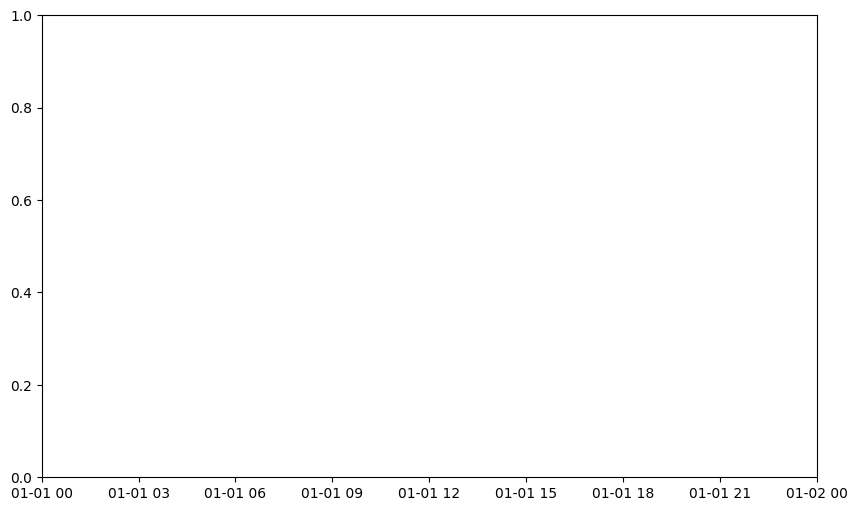

In [143]:
from datetime import datetime, timedelta
import numpy as np

# Setup
fmin = 21.68e6  # Hz
fmax = 59.18e6  # Hz
num_channels = 32
num_subbands = 192
num_freq_bins = num_channels * num_subbands

start_time = datetime(2025, 3, 25, 9, 13, 12, 10)  # 2025-03-25 09:13:12.0000103 → about 10 microseconds
end_time = datetime(2025, 3, 25, 14, 49, 41, 739115)  # 14:49:34 + 7 sec → 14:49:41.739115
time_cadence = 0.02097  # seconds

# Frequency array
freq = np.linspace(fmin, fmax, num_freq_bins)

# Time array
time_steps = int((end_time - start_time).total_seconds() / time_cadence)
time = [start_time + timedelta(seconds=i * time_cadence) for i in range(time_steps)]
time = np.array(time)  # to make it easier later


# Plotting
plt.figure(figsize=(10, 6))
plt.pcolormesh(time, freq, data.T, cmap='inferno')  # Transpose for correct orientation
plt.colorbar(label='Intensity')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

In [207]:
def combine_spectra(
    date,                    # Observation date in YYYYMMDD format
    time,                    # Observation time in HHmm format
    output_dir,              # Directory where outputs will be saved
    stokes="I",              # Stokes parameter (default: "I" for intensity)
    rebin_dt=0.5 * u.s,      # Time resolution for rebinning
    rebin_df=100 * u.kHz,    # Frequency resolution for rebinning
    tmin=None,               # Start time for processing
    tmax=None,               # End time for processing
    force_reload=False       # If True, force recompute spectra
):
    """
    Load, combine, and save the .spectra files into a single combined file.

    date         : Observation date in YYYYMMDD format
    time         : Observation time in HHmm format
    output_dir   : Directory where outputs will be saved
    stokes       : Stokes parameter (default: 'I' for intensity)
    rebin_dt     : Time resolution for rebinning
    rebin_df     : Frequency resolution for rebinning
    tmin         : Start time for processing
    tmax         : End time for processing
    force_reload : If True, force recompute spectra
    """
    # Define output filename
    combined_output_path = os.path.join(output_dir, f'{date}T{time}_combined.spectra.npz')
    
    # Check if the file already exists
    if not force_reload and os.path.exists(combined_output_path):
        print(f':white_check_mark: Combined spectra already exist: {combined_output_path}')
        return combined_output_path
    
    # Parse year, month, and day from the input date
    year, month, day = date[:4], date[4:6], date[6:8]
    base_path = f'/databf/nenufar-tf/LT11/{year}/{month}/'
    sun_tracking_folder = None
    
    # Locate the _SUN_TRACKING folder
    for folder in os.listdir(base_path):
        if date in folder and '_SUN_TRACKING' in folder:
            sun_tracking_folder = os.path.join(base_path, folder)
            break
    
    if not sun_tracking_folder:
        raise FileNotFoundError(f'No _SUN_TRACKING folder found for {date} in {base_path}.')
    
    # Locate the .spectra files
    low_freq_path, high_freq_path = None, None
    
    for file in os.listdir(sun_tracking_folder):
        if file.endswith('_0.spectra'):
            low_freq_path = os.path.join(sun_tracking_folder, file)
        elif file.endswith('_1.spectra'):
            high_freq_path = os.path.join(sun_tracking_folder, file)
    
    if not low_freq_path or not high_freq_path:
        raise FileNotFoundError(f'Both low and high frequency .spectra files not found in {sun_tracking_folder}.')
    
    # Define common parameters for `.get()`
    get_kwargs = {
        'stokes': stokes,
        'rebin_dt': rebin_dt,
        'rebin_df': rebin_df,
    }
    
    if tmin:
        get_kwargs['tmin'] = tmin
    if tmax:
        get_kwargs['tmax'] = tmax
    
    # Load both files **using the full frequency range**
    print(f':inbox_tray: Loading low-frequency data from {low_freq_path}')
    
    low_data = Spectra(low_freq_path)
    # low_data.pipeline.parameters['remove_channels'] = [0, 1, -1]
    low_data = low_data.get(**get_kwargs)  # Apply only time filtering
    
    print(f':inbox_tray: Loading high-frequency data from {high_freq_path}')
    
    high_data = Spectra(high_freq_path)
    # high_data.pipeline.parameters['remove_channels'] = [0, 1, -1]
    high_data = high_data.get(**get_kwargs)  # Apply only time filtering
    
    # Ensure time axes match exactly by truncating extra time steps
    if len(low_data.time.unix) > len(high_data.time.unix):
        print(f':warning: Truncating low-frequency data: removing {len(low_data.time.unix) - len(high_data.time.unix)} extra time steps.')
        low_data = low_data[:len(high_data.time.unix), :, :]
    
    elif len(high_data.time.unix) > len(low_data.time.unix):
        print(f':warning: Truncating high-frequency data: removing {len(high_data.time.unix) - len(low_data.time.unix)} extra time steps.')
        high_data = high_data[:len(low_data.time.unix), :, :]
    
    # Confirm alignment
    assert len(low_data.time.unix) == len(high_data.time.unix), ':x: Time axes are still mismatched after truncation!'
    
    # Combine data
    print(':arrows_counterclockwise: Combining low and high frequency data ...')
    
    combined_data = np.concatenate((low_data.data, high_data.data), axis=1)
    combined_freq_values = np.concatenate((low_data.freq.to_value('MHz'), high_data.freq.to_value('MHz')))
    
    # Save the combined data
    np.savez(
        combined_output_path,
        data=combined_data,
        time=low_data.time.unix,  # Time axis (now perfectly aligned)
        freq=combined_freq_values
    )
    print(f':white_check_mark: Combined data saved to: {combined_output_path}')
    
    return combined_output_path

In [218]:
combine_spectra('20250325',
                '1033',
                '/home/mnedal/outputs/data/',
                stokes='I',
                rebin_dt=None,
                rebin_df=None,
                tmin='2025-03-25T10:33:00',
                tmax='2025-03-25T10:41:00',
                force_reload=True)

:inbox_tray: Loading low-frequency data from /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra
2025-04-29 16:01:06 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-04-29 16:01:06 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-04-29 16:01:06 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-29 16:01:06 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-04-29 16:01:06 | INFO: Computing time-frequency axes...
2025-04-29 16:01:06 | INFO: Re-organize data into Jones matrices...
2025-04-29 16:01:06 | INFO: 	Convert data to Dask array
2025-04-29 16:01:07 | INFO: Data loaded.
2025-04-29 16:01:07 | INFO: Selecting times (between 2025-03-25T10:33:00.000 and 2025-03-25T10:41

'/home/mnedal/outputs/data/20250325T1033_combined.spectra.npz'

In [219]:
# Load the .npz file
data = np.load('/home/mnedal/outputs/data/20250325T1033_combined.spectra.npz')

# Check keys to understand what’s inside
print(data.files)

# Extract arrays (use the actual key names from the print above)
time = data['time']    # 1D array, shape (T,)
freq = data['freq']    # 1D array, shape (F,)
flux = data['data']    # 2D array, shape (T, F, 1)
flux = np.squeeze(flux)  # Now shape is (T, F)
# Convert to datetime64 for entire array
time_dt = np.array([datetime.utcfromtimestamp(t) for t in time])

['data', 'time', 'freq']


In [220]:
time.shape, freq.shape, flux.shape

((22889,), (10240,), (22889, 10240))

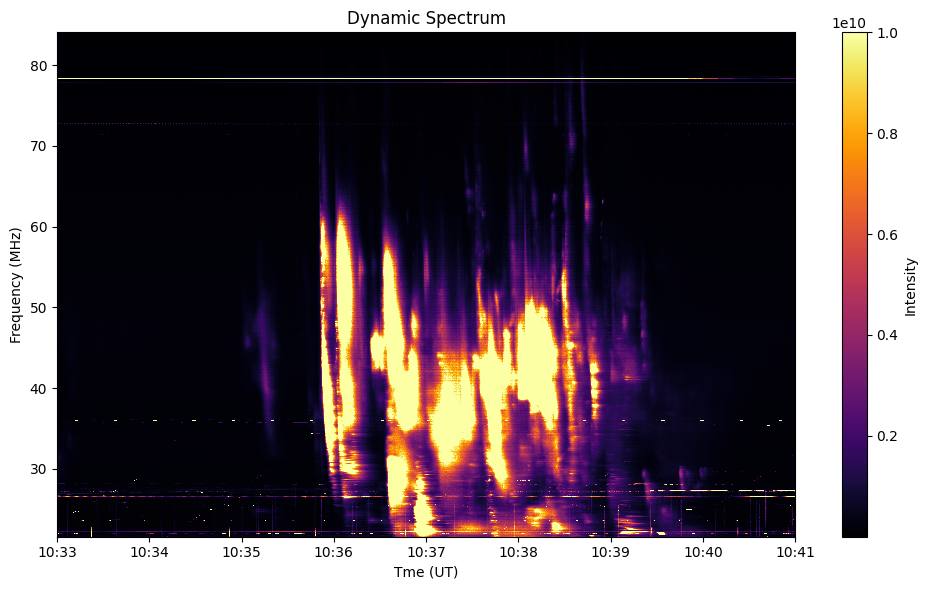

In [221]:
# Plotting
fig = plt.figure(figsize=[10,6])
ax  = fig.add_subplot(111)
img = ax.pcolormesh(time_dt, frequency, flux.T,
                    vmin=1e4, vmax=1e10,
                    shading='auto', cmap='inferno')
fig.colorbar(img, label='Intensity')
ax.set_xlabel('Tme (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title('Dynamic Spectrum')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.tight_layout()
plt.show()

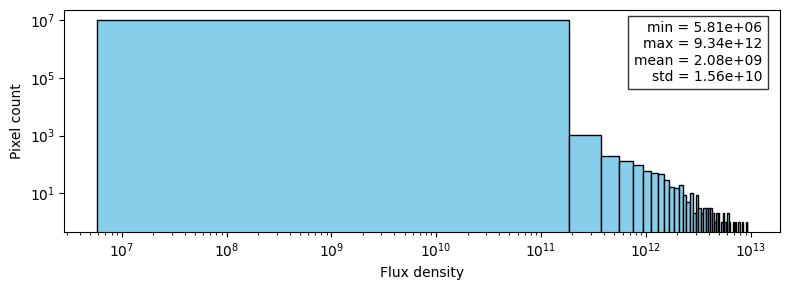

In [216]:
radio_flux = flux.flatten()

def make_stats_box(radio_flux):
    return (
        rf'min = {np.nanmin(radio_flux):.2e}' + '\n' +
        rf'max = {np.nanmax(radio_flux):.2e}' + '\n' +
        rf'mean = {np.nanmean(radio_flux):.2e}' + '\n' +
        rf'std = {np.nanstd(radio_flux):.2e}'
    )

fig = plt.figure(figsize=[8,3])
ax  = fig.add_subplot(111)
ax.hist(radio_flux, bins=50, log=False, color='skyblue', edgecolor='k')
ax.text(0.975, 0.95, make_stats_box(radio_flux), transform=ax.transAxes,
        fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.8))
ax.set_ylabel('Pixel count')
ax.set_xlabel('Flux density')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(False)
fig.tight_layout()
plt.show()

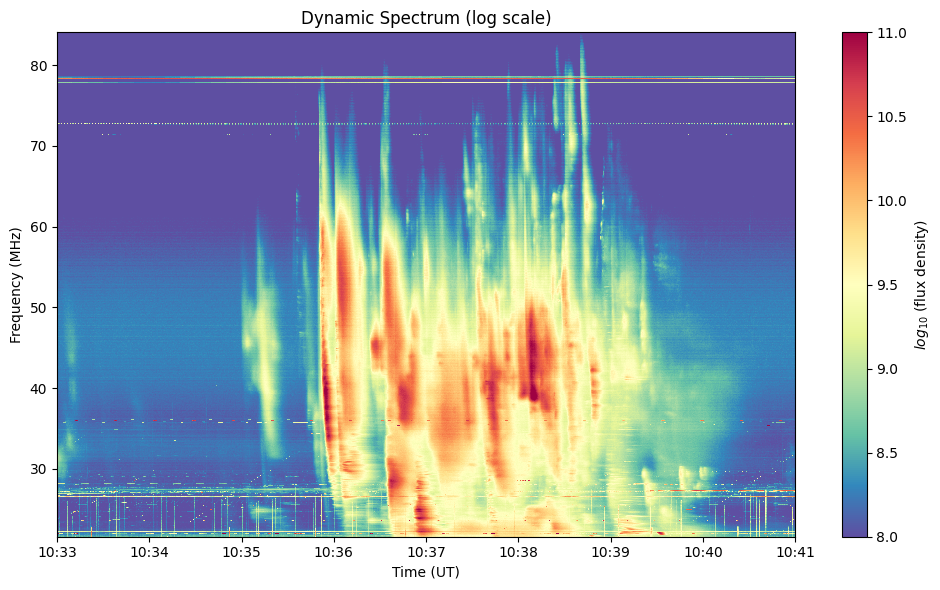

In [224]:
# Take log10 of the flux
log_flux = np.log10(flux)

fig = plt.figure(figsize=[10,6])
ax  = fig.add_subplot(111)
img = ax.pcolormesh(time_dt, frequency, log_flux.T,
                    vmin=8, vmax=11,  # corresponds to 1e{vmin} to 1e{vmax}
                    shading='auto', cmap='Spectral_r')
fig.colorbar(img, label=r'$log_{10}$ (flux density)')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title('Dynamic Spectrum (log scale)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.tight_layout()
plt.show()

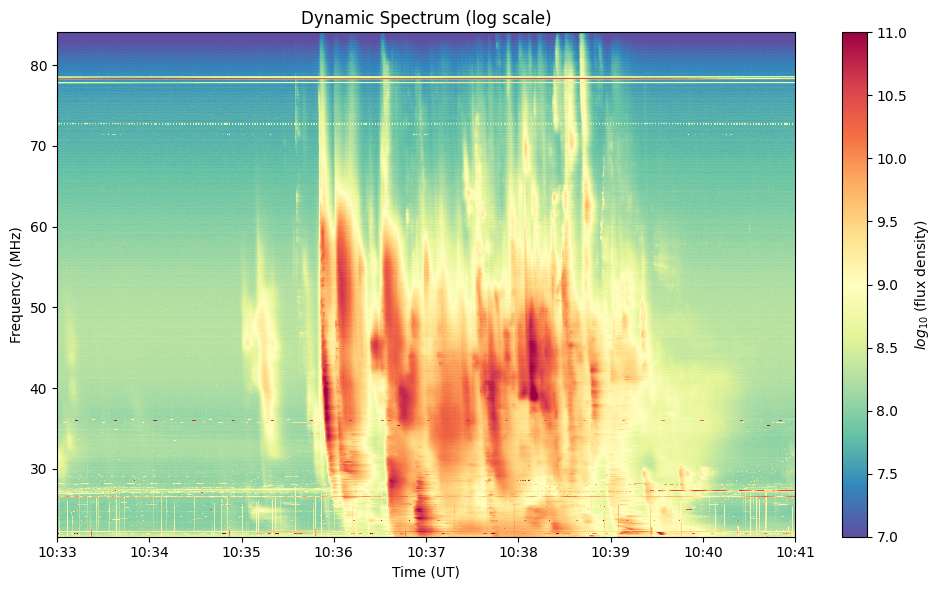

In [225]:
# Take log10 of the flux
log_flux = np.log10(flux)

fig = plt.figure(figsize=[10,6])
ax  = fig.add_subplot(111)
pc  = ax.pcolormesh(time_dt, frequency, log_flux.T,
                    vmin=7, vmax=11,
                    shading='auto', cmap='Spectral_r')
fig.colorbar(pc, ax=ax, label=r'$log_{10}$ (flux density)')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title('Dynamic Spectrum (log scale)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.tight_layout()
plt.show()

In [ ]:
# Plot vertical line at that time
chosen_time_str = '2025-03-25 10:36:00'
chosen_time = mdates.date2num(datetime.strptime(chosen_time_str, '%Y-%m-%d %H:%M:%S'))

fig = plt.figure(figsize=[10,6])
ax  = fig.add_subplot(111)
pc  = ax.pcolormesh(time_dt, frequency, log_flux.T,
                    vmin=7, vmax=11,
                    shading='auto', cmap='Spectral_r')
fig.colorbar(pc, ax=ax, label=r'$log_{10}$ (flux density)')
ax.axvline(x=chosen_time, c='r', ls='--')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title('Stokes I (log scale), after subband flattening')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.tight_layout()
plt.show()

In [241]:
t_ms = [ t.total_seconds()*1e3 for t in np.diff(time_dt) ]

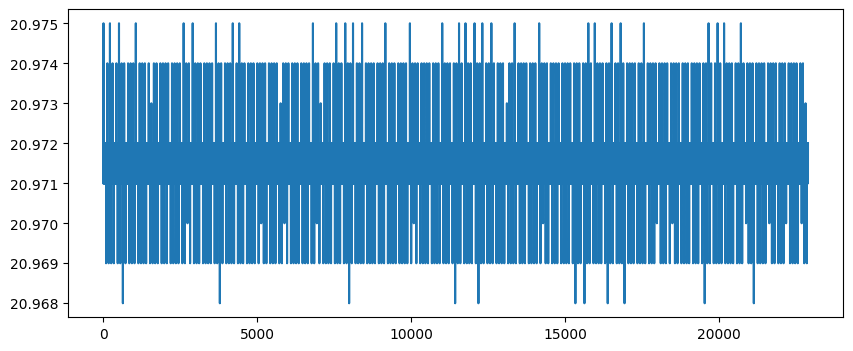

In [242]:
plt.figure(figsize=[10,4])
plt.plot(t_ms)
plt.show()

### Unfolding the function above

In [261]:
date     = '2025-03-25'
data_dir = '/databf/nenufar-tf/LT11'
obs_dir  = '20250325_091200_20250325_145000_SUN_TRACKING'

year, month, day = date.split('-')
spectra_files = sorted(glob.glob(f'{data_dir}/{year}/{month}/{obs_dir}/*.spectra'))
low_freq_path  = [ file for file in spectra_files if file.endswith('_0.spectra') ][0]
high_freq_path = [ file for file in spectra_files if file.endswith('_1.spectra') ][0]

2025-04-30 17:28:34 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-04-30 17:28:34 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-04-30 17:28:34 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-30 17:28:35 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-04-30 17:28:35 | INFO: Computing time-frequency axes...
2025-04-30 17:28:35 | INFO: Re-organize data into Jones matrices...
2025-04-30 17:28:35 | INFO: 	Convert data to Dask array
2025-04-30 17:28:35 | INFO: Data loaded.
2025-04-30 17:28:35 | INFO: Selecting times (between 2025-03-25T10:35:40.000 and 2025-03-25T10:36:40.000)...
2025-04-30 17:28:35 | INFO: 	2862 time samples selected.
2025-04-30 17:28:35 | INFO: Selecting frequencies (between 21.6796875 MHz and 59.1796875 MHz

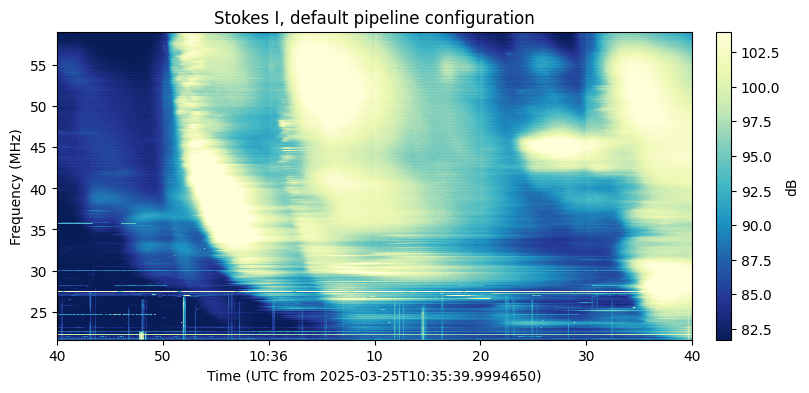

In [262]:
low_data = Spectra(filename=low_freq_path)
low_data.pipeline.parameters['tmin'] = '2025-03-25T10:35:40'
low_data.pipeline.parameters['tmax'] = '2025-03-25T10:36:40'

low_data = low_data.get(stokes='I')
low_data.plot(figsize=[10,4], title='Stokes I, default pipeline configuration')

2025-04-30 17:28:52 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_1.spectra...
2025-04-30 17:28:52 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_1.spectra has been correctly parsed.
2025-04-30 17:28:52 | INFO: Checking for missing data (can take up to 1 min)...
2025-04-30 17:28:52 | INFO: 	There are 2/15276 blocks containing missing data and/or wrong time information.
2025-04-30 17:28:52 | INFO: Computing time-frequency axes...
2025-04-30 17:28:52 | INFO: Re-organize data into Jones matrices...
2025-04-30 17:28:52 | INFO: 	Convert data to Dask array
2025-04-30 17:28:52 | INFO: Data loaded.
2025-04-30 17:28:52 | INFO: Selecting times (between 2025-03-25T10:35:40.000 and 2025-03-25T10:36:40.000)...
2025-04-30 17:28:52 | INFO: 	2862 time samples selected.
2025-04-30 17:28:52 | INFO: Selecting frequencies (between 59.1796875 MHz and 84.1796875 MHz

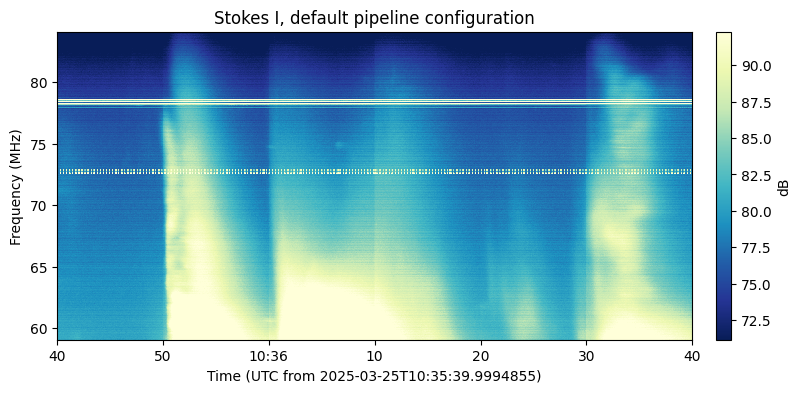

In [263]:
high_data = Spectra(high_freq_path)
high_data.pipeline.parameters['tmin'] = '2025-03-25T10:35:40'
high_data.pipeline.parameters['tmax'] = '2025-03-25T10:36:40'

high_data = high_data.get(stokes='I')
high_data.plot(figsize=[10,4], title='Stokes I, default pipeline configuration')

In [302]:
len(low_data.time.unix), len(high_data.time.unix)

(2862, 2862)

2025-05-02 14:41:36 | INFO: Reading /databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra...
2025-05-02 14:41:36 | INFO: 	/databf/nenufar-tf/LT11/2025/03/20250325_091200_20250325_145000_SUN_TRACKING/SUN_TRACKING_20250325_091237_0.spectra has been correctly parsed.
2025-05-02 14:41:36 | INFO: Checking for missing data (can take up to 1 min)...
2025-05-02 14:41:36 | INFO: 	There are 3/22914 blocks containing missing data and/or wrong time information.
2025-05-02 14:41:36 | INFO: Computing time-frequency axes...
2025-05-02 14:41:36 | INFO: Re-organize data into Jones matrices...
2025-05-02 14:41:36 | INFO: 	Convert data to Dask array
2025-05-02 14:41:36 | INFO: Data loaded.
2025-05-02 14:41:36 | INFO: Selecting times (between 2025-03-25T10:35:40.000 and 2025-03-25T10:36:40.000)...
2025-05-02 14:41:36 | INFO: 	2862 time samples selected.
2025-05-02 14:41:36 | INFO: Selecting frequencies (between 21.6796875 MHz and 59.1796875 MHz

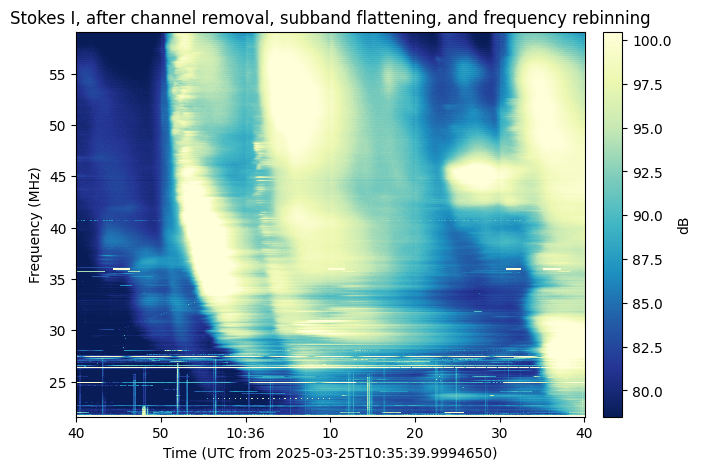

In [305]:
remove_channels = True
flatten_subband = True
freq_rebin      = True

low_data = Spectra(low_freq_path)

if remove_channels and not flatten_subband and not freq_rebin:
    low_data.pipeline = TFPipeline(low_data, TFTask.remove_channels())
    low_data.pipeline.parameters['tmin'] = '2025-03-25T10:35:40'
    low_data.pipeline.parameters['tmax'] = '2025-03-25T10:36:40'
    low_data = low_data.get(stokes='I', remove_channels=[0,-1])
    low_data.plot(figsize=[8,5], title='Stokes I, after channel removal')

elif freq_rebin and not flatten_subband and not remove_channels:
    low_data.pipeline = TFPipeline(low_data, TFTask.frequency_rebin())
    low_data.pipeline.parameters['tmin'] = '2025-03-25T10:35:40'
    low_data.pipeline.parameters['tmax'] = '2025-03-25T10:36:40'
    low_data = low_data.get(stokes='I', rebin_df=50*u.kHz)
    low_data.plot(figsize=[8,5], title='Stokes I, after frequency rebinning')

elif remove_channels and freq_rebin and not flatten_subband:
    low_data.pipeline = TFPipeline(low_data, TFTask.remove_channels(), TFTask.frequency_rebin())
    low_data.pipeline.parameters['tmin'] = '2025-03-25T10:35:40'
    low_data.pipeline.parameters['tmax'] = '2025-03-25T10:36:40'
    low_data = low_data.get(stokes='I', remove_channels=[0,-1], rebin_df=50*u.kHz)
    low_data.plot(figsize=[8,5], title='Stokes I, after channel removal and frequency rebinning')

elif remove_channels and flatten_subband and freq_rebin:
    low_data.pipeline = TFPipeline(low_data, TFTask.remove_channels(), TFTask.flatten_subband(), TFTask.frequency_rebin())
    low_data.pipeline.parameters['tmin'] = '2025-03-25T10:35:40'
    low_data.pipeline.parameters['tmax'] = '2025-03-25T10:36:40'
    low_data = low_data.get(stokes='I', remove_channels=[0,-1], rebin_df=50*u.kHz)
    low_data.plot(figsize=[8,5], title='Stokes I, after channel removal, subband flattening, and frequency rebinning')

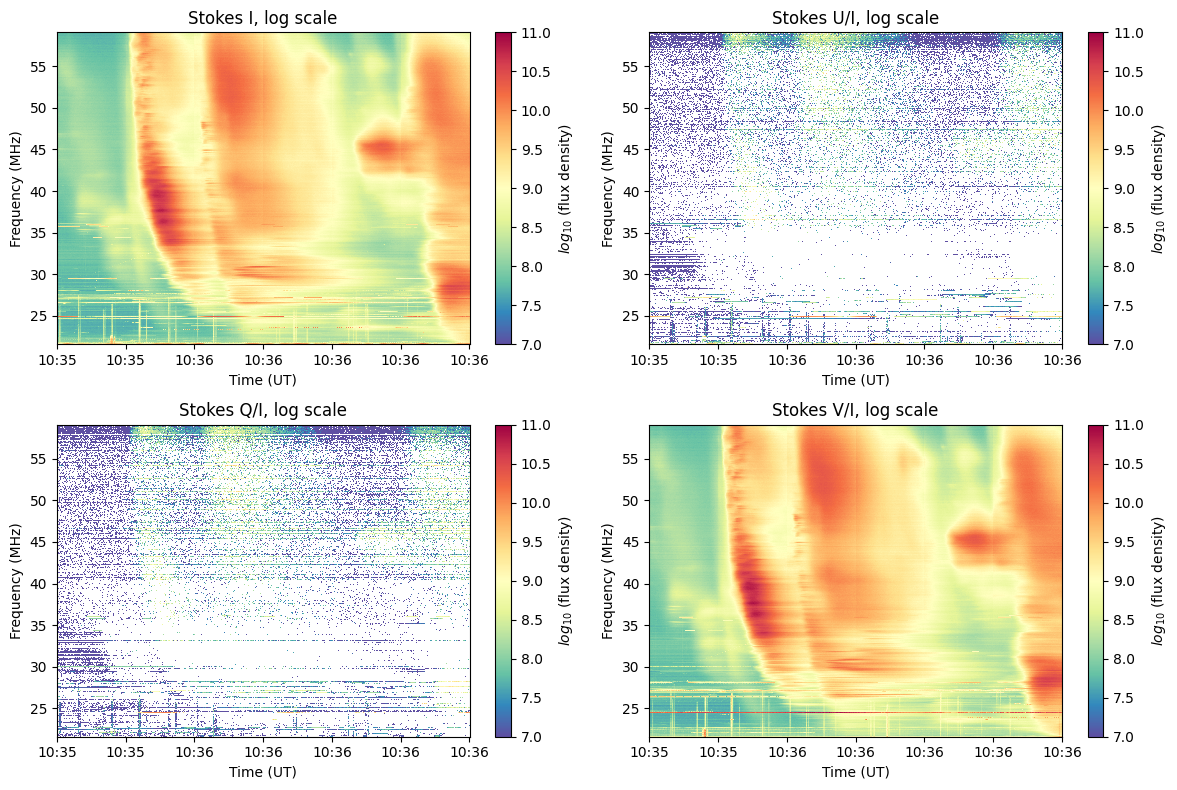

In [313]:
freqs = low_data.freq.to_value('MHz')
times = np.array([datetime.utcfromtimestamp(t) for t in low_data.time.unix])

fig = plt.figure(figsize=[12,8])

ax = fig.add_subplot(221)
flux = low_data.data[:,:,0].real
log_flux = np.log10(flux)
pc = ax.pcolormesh(times, freqs, log_flux.T,
                    vmin=7, vmax=11,
                    shading='auto', cmap='Spectral_r')
fig.colorbar(pc, ax=ax, label=r'$log_{10}$ (flux density)')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title('Stokes I, log scale')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax  = fig.add_subplot(222)
flux = low_data.data[:,:,1].real
log_flux = np.log10(flux)
pc = ax.pcolormesh(times, freqs, log_flux.T,
                    vmin=7, vmax=11,
                    shading='auto', cmap='Spectral_r')
fig.colorbar(pc, ax=ax, label=r'$log_{10}$ (flux density)')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title('Stokes U/I, log scale')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax  = fig.add_subplot(223)
flux = low_data.data[:,:,2].real
log_flux = np.log10(flux)
pc = ax.pcolormesh(times, freqs, log_flux.T,
                    vmin=7, vmax=11,
                    shading='auto', cmap='Spectral_r')
fig.colorbar(pc, ax=ax, label=r'$log_{10}$ (flux density)')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title('Stokes Q/I, log scale')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax  = fig.add_subplot(224)
flux = low_data.data[:,:,3].real
log_flux = np.log10(flux)
pc = ax.pcolormesh(times, freqs, log_flux.T,
                    vmin=7, vmax=11,
                    shading='auto', cmap='Spectral_r')
fig.colorbar(pc, ax=ax, label=r'$log_{10}$ (flux density)')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.set_title('Stokes V/I, log scale')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

fig.tight_layout()
plt.show()

In [304]:
low_data.data.shape

(2862, 768, 4)

In [ ]:
combined_data  = np.concatenate((low_data.data, high_data.data), axis=1)
combined_freqs = np.concatenate((low_data.freq.to_value('MHz'), high_data.freq.to_value('MHz')))

# Save the combined data
np.savez(
    combined_output_path,
    data=combined_data,
    time=low_data.time.unix,
    freq=combined_freq_values
)
print(f':white_check_mark: Combined data saved to: {combined_output_path}')

return combined_output_path